In [148]:
import numpy as np
import pandas as pd

In [149]:
# pd read transaksiFix.csv
df = pd.read_csv('transaksi.csv')
df2 = pd.read_csv('Customer.csv')

In [150]:
df = df[['Customer','Tipe Produk']]
df.head()

,Customer,Tipe Produk
0,Ade,Produk A
1,Qayug,Produk A
2,Ixoim,Produk D
3,Yinoh,Produk C
4,Hoosnestrond,Produk C


In [151]:
df2 = df2[['Name','Usia']]
df2.head()

,Name,Usia
0,Chi,32
1,Dubaku,28
2,Taurai,35
3,Thokozani,36
4,Ufuoma,48


In [152]:
df3 = pd.merge(df, df2, left_on='Customer', right_on='Name')
df3.head(20)

,Customer,Tipe Produk,Name,Usia
0,Ade,Produk A,Ade,42
1,Ade,Produk G,Ade,42
2,Ade,Produk E,Ade,42
3,Ade,Produk F,Ade,42
4,Ade,Produk D,Ade,42
5,Ade,Produk A,Ade,42
6,Ade,Produk F,Ade,42
7,Ade,Produk E,Ade,42
8,Ade,Produk A,Ade,42
9,Ade,Produk B,Ade,42


In [153]:
df3 = df3.drop(['Name', 'Customer'], axis=1)

In [154]:
df3.head(20)

,Tipe Produk,Usia
0,Produk A,42
1,Produk G,42
2,Produk E,42
3,Produk F,42
4,Produk D,42
5,Produk A,42
6,Produk F,42
7,Produk E,42
8,Produk A,42
9,Produk B,42


In [155]:
df3['Usia'] = pd.cut(df3['Usia'], bins=[10,20,30,40,50], labels=['11-20','21-30','31-40','41-50'])

In [156]:
df3.head()

,Tipe Produk,Usia
0,Produk A,41-50
1,Produk G,41-50
2,Produk E,41-50
3,Produk F,41-50
4,Produk D,41-50


<AxesSubplot: xlabel='Usia'>

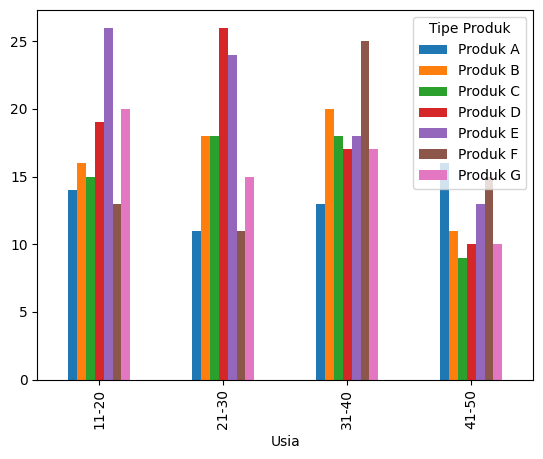

In [157]:
df3.groupby(['Usia','Tipe Produk']).size().unstack().plot(kind='bar', stacked=False)

In [158]:
df3 = df3.groupby(['Usia','Tipe Produk']).size().unstack()

In [159]:
df3.head()

Tipe Produk,Produk A,Produk B,Produk C,Produk D,Produk E,Produk F,Produk G
Usia,,,,,,,
11-20,14,16,15,19,26,13,20
21-30,11,18,18,26,24,11,15
31-40,13,20,18,17,18,25,17
41-50,16,11,9,10,13,15,10


In [160]:
df3['Produk Terlaris'] = df3.idxmax(axis=1)

df3.head()

Tipe Produk,Produk A,Produk B,Produk C,Produk D,Produk E,Produk F,Produk G,Produk Terlaris
Usia,,,,,,,,
11-20,14,16,15,19,26,13,20,Produk E
21-30,11,18,18,26,24,11,15,Produk D
31-40,13,20,18,17,18,25,17,Produk F
41-50,16,11,9,10,13,15,10,Produk A


In [161]:
# drop Produk A - G
df3 = df3.drop(['Produk A','Produk B','Produk C','Produk D','Produk E','Produk F','Produk G'], axis=1)

In [162]:
df3.head()

Tipe Produk,Produk Terlaris
Usia,
11-20,Produk E
21-30,Produk D
31-40,Produk F
41-50,Produk A
